In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
data=pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [147]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [149]:
data['housing_median_age']

0        41.0
1        21.0
2        52.0
3        52.0
4        52.0
         ... 
20635    25.0
20636    18.0
20637    17.0
20638    18.0
20639    16.0
Name: housing_median_age, Length: 20640, dtype: float64

In [150]:
data.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

In [151]:
data['ocean_proximity'].nunique()

5

In [152]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [153]:
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [154]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<h1>Visualizing all column<h1>

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

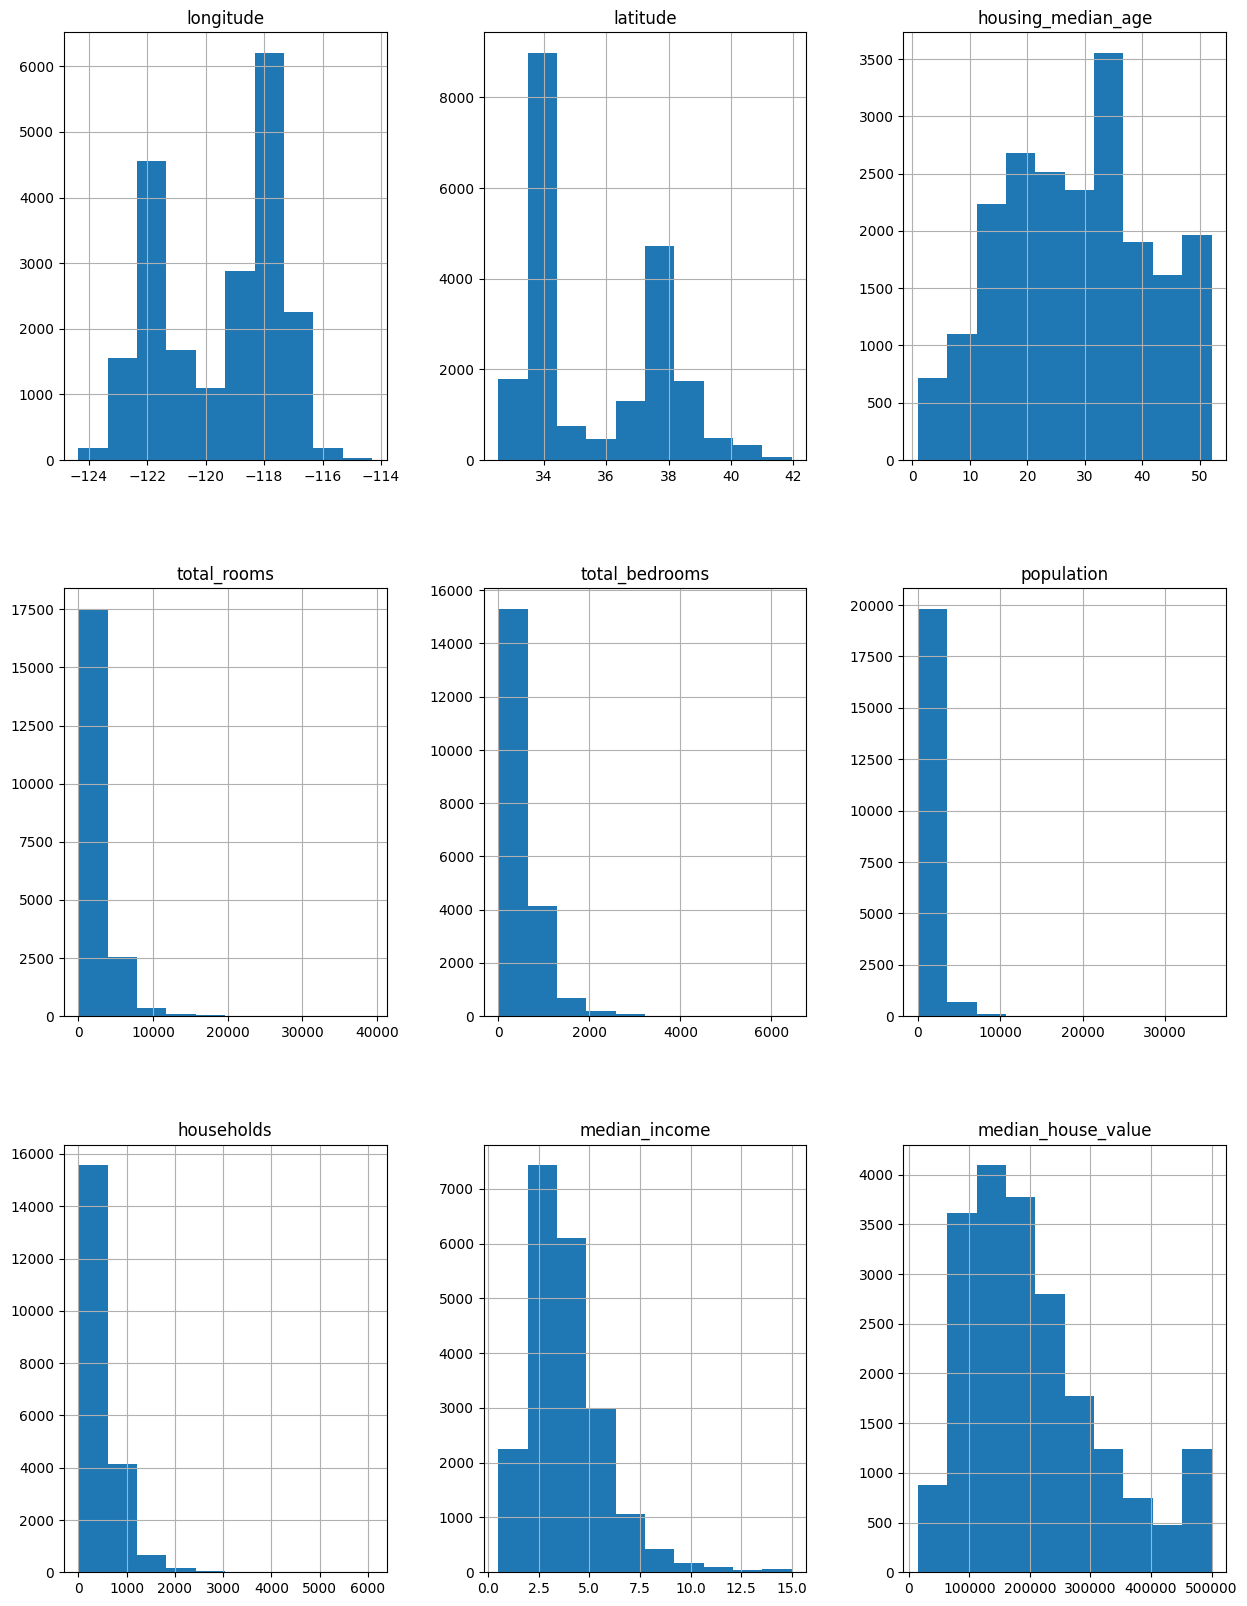

In [155]:
data.hist(bins=10,figsize=(15,20))

In [156]:
data.iloc[:,:-1].corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [157]:
data.iloc[:,:-1].corr()['median_house_value']

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

<h2>Categorizing a numerical attribute for stratified splitting <h2>

In [158]:
data['median_income'].head(10)

0    8.3252
1    8.3014
2    7.2574
3    5.6431
4    3.8462
5    4.0368
6    3.6591
7    3.1200
8    2.0804
9    3.6912
Name: median_income, dtype: float64

In [159]:
data['median_income'].value_counts()

median_income
3.1250     49
15.0001    49
2.8750     46
2.6250     44
4.1250     44
           ..
4.0774      1
4.1767      1
6.1814      1
6.4319      1
2.0943      1
Name: count, Length: 12928, dtype: int64

<Axes: >

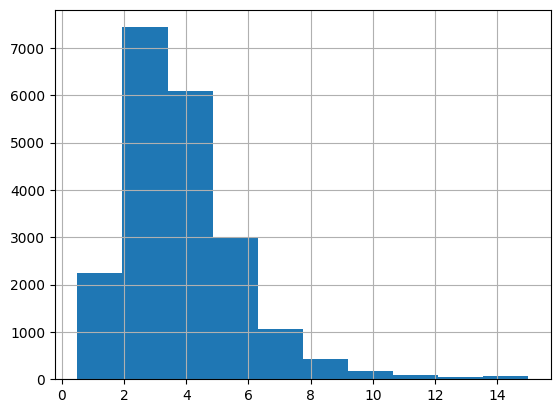

In [160]:
data['median_income'].hist()

In [161]:
data['median_income'].min()


0.4999

In [162]:
data['median_income'].max()

15.0001

In [163]:
data['income_category']= pd.cut(data['median_income'],bins=[0,2,3,4.5,6.2,11,np.inf],labels=[1,2,3,4,5,6])
data['income_category'].head(10)

0    5
1    5
2    5
3    4
4    3
5    3
6    3
7    3
8    2
9    3
Name: income_category, dtype: category
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6]

In [164]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [165]:
data['income_category'].nunique()

6

In [166]:
data['income_category'].value_counts()

income_category
3    7236
2    4946
4    3992
1    2457
5    1851
6     158
Name: count, dtype: int64

In [167]:
7236+4946+3992+2457+1851+158

20640

<Axes: xlabel='income_category'>

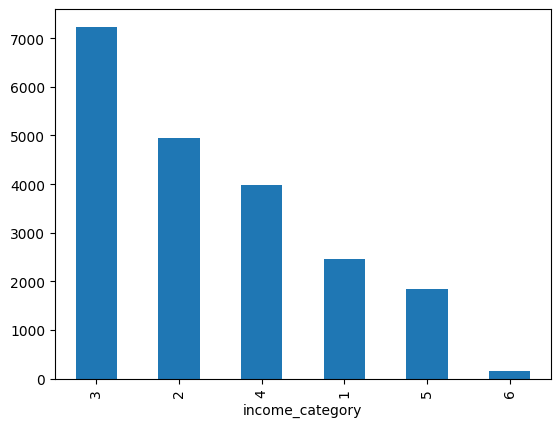

In [168]:
data['income_category'].value_counts().plot.bar()

In [169]:
data['income_category'].value_counts(normalize=True)

income_category
3    0.350581
2    0.239632
4    0.193411
1    0.119041
5    0.089680
6    0.007655
Name: proportion, dtype: float64

In [170]:
0.350581+0.239632+0.193411+ 0.119041+0.089680+0.007655

0.9999999999999999

<h1>our own train test split mathod </h1>

In [171]:
indices = np.random.permutation(len(data))

In [172]:
 indices

array([20512, 15568,  4047, ..., 17789, 18814, 16770])

In [173]:
len(indices)

20640

In [174]:
train = round(len(indices)*0.8)

In [175]:
train

16512

In [176]:
test=round(len(indices)*0.2)

In [177]:
test

4128

In [178]:
data.iloc[indices[:train]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
20512,-121.55,38.59,36.0,435.0,95.0,285.0,90.0,1.2292,69600.0,INLAND,1
15568,-117.04,33.09,16.0,4677.0,581.0,1902.0,566.0,6.1834,335600.0,<1H OCEAN,4
4047,-118.51,34.14,28.0,6748.0,904.0,2431.0,876.0,12.8879,500001.0,<1H OCEAN,6
18127,-122.02,37.34,30.0,1036.0,151.0,467.0,156.0,6.4480,360600.0,<1H OCEAN,5
3548,-118.61,34.25,16.0,8295.0,1506.0,3903.0,1451.0,5.5111,276600.0,<1H OCEAN,4
...,...,...,...,...,...,...,...,...,...,...,...
10273,-117.86,33.87,19.0,1591.0,279.0,891.0,237.0,5.6573,216000.0,<1H OCEAN,4
20054,-119.30,35.87,20.0,1934.0,377.0,1341.0,336.0,2.1434,62600.0,INLAND,2
9053,-118.12,34.70,7.0,4915.0,885.0,2833.0,874.0,4.3229,130000.0,INLAND,3
13215,-117.72,34.02,17.0,1781.0,262.0,860.0,256.0,6.5958,236800.0,INLAND,5


In [179]:
data.iloc[indices[train:]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
17157,-122.21,37.43,20.0,975.0,134.0,324.0,146.0,9.7796,500001.0,NEAR OCEAN,5
714,-122.09,37.68,41.0,1382.0,353.0,704.0,314.0,3.5114,197500.0,NEAR BAY,3
12295,-116.89,33.93,29.0,4549.0,916.0,2494.0,912.0,2.0976,72600.0,INLAND,2
18279,-122.08,37.35,35.0,1347.0,207.0,548.0,189.0,7.7068,500001.0,NEAR BAY,5
9811,-121.94,36.57,28.0,3153.0,409.0,569.0,271.0,14.4113,500001.0,NEAR OCEAN,6
...,...,...,...,...,...,...,...,...,...,...,...
20381,-118.83,34.14,16.0,1956.0,312.0,671.0,319.0,6.4001,321800.0,NEAR OCEAN,5
123,-122.24,37.84,52.0,3529.0,574.0,1177.0,555.0,5.1773,389500.0,NEAR BAY,4
17789,-121.83,37.35,31.0,2914.0,715.0,3547.0,645.0,3.7143,178600.0,<1H OCEAN,3
18814,-121.45,41.04,33.0,2029.0,378.0,936.0,343.0,2.6700,77500.0,INLAND,2


In [180]:
def my_train_test_split(data, ratio, seed):
    np.random.seed(seed)
    shuffle_indices=np.random.permutation(len(data))
    train_ratio=round(len(shuffle_indices)*ratio)
    train_data=data.iloc[shuffle_indices[:train_ratio]]
    test_data=data.iloc[shuffle_indices[train_ratio:]]
    return train_data, test_data 

In [181]:
train_data, test_data=my_train_test_split(data, 0.8, 42)

In [182]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND,1
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND,2
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY,3
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN,4
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
20011,-119.12,36.05,27.0,1575.0,321.0,1063.0,317.0,2.1477,53900.0,INLAND,2
12225,-116.90,33.65,15.0,652.0,149.0,248.0,97.0,2.1071,93800.0,INLAND,2
1051,-120.71,38.34,16.0,1257.0,231.0,559.0,213.0,4.4531,144300.0,INLAND,3
14519,-117.13,32.91,16.0,2715.0,581.0,1619.0,584.0,4.0000,154700.0,<1H OCEAN,3


In [183]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
9221,-120.26,37.13,33.0,1239.0,250.0,648.0,227.0,2.0278,58800.0,INLAND,2
10234,-117.91,33.86,26.0,2296.0,570.0,1415.0,527.0,2.4732,165800.0,<1H OCEAN,2
4763,-118.36,34.04,48.0,1769.0,429.0,993.0,405.0,2.3214,139400.0,<1H OCEAN,2
9062,-118.15,34.69,32.0,1300.0,234.0,712.0,249.0,3.2500,107500.0,INLAND,3
1874,-119.97,38.93,24.0,856.0,185.0,388.0,108.0,3.1806,107200.0,INLAND,3
...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN,5
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND,3
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN,2
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN,4


<h1>Stratified Splitting using sklearn</h1>

In [184]:
from sklearn.model_selection import StratifiedShuffleSplit
shuffle_data=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [185]:
gen_Obj=shuffle_data.split(data, data['income_category'])

In [186]:
gen_Obj

<generator object BaseShuffleSplit.split at 0x000001FB25D17040>

In [187]:
IndexList=next(gen_Obj)

In [188]:
IndexList

(array([10237,  1290, 11221, ..., 16080, 16365,  6888], dtype=int64),
 array([17428, 15123, 14508, ..., 10778,  9836,  6748], dtype=int64))

In [189]:
len(IndexList[0])

16512

In [190]:
len(IndexList[1])

4128

In [191]:
start_train_data=data.iloc[IndexList[0]]

In [192]:
start_train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
10237,-117.87,33.91,16.0,2434.0,455.0,1017.0,476.0,4.2188,176300.0,<1H OCEAN,3
1290,-121.79,38.00,34.0,3090.0,593.0,1588.0,566.0,3.6118,124700.0,INLAND,3
11221,-117.90,33.80,23.0,1368.0,397.0,1940.0,358.0,3.0789,350000.0,<1H OCEAN,3
20394,-118.87,34.22,14.0,3108.0,451.0,1566.0,434.0,6.2423,305400.0,<1H OCEAN,5
7336,-118.15,33.98,37.0,1184.0,290.0,1320.0,276.0,2.3000,165600.0,<1H OCEAN,2
...,...,...,...,...,...,...,...,...,...,...,...
14632,-117.20,32.80,34.0,4854.0,912.0,2089.0,854.0,3.8542,200000.0,NEAR OCEAN,3
8945,-118.47,34.01,27.0,1782.0,471.0,837.0,422.0,3.7727,413000.0,<1H OCEAN,3
16080,-122.49,37.74,52.0,2442.0,449.0,1188.0,436.0,4.3909,317700.0,NEAR OCEAN,3
16365,-121.31,38.02,24.0,4157.0,951.0,2734.0,879.0,2.7981,92100.0,INLAND,2


In [193]:
start_test_data = data.iloc[IndexList[1]]

In [194]:
start_test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
17428,-120.47,34.65,16.0,2549.0,428.0,1486.0,432.0,4.2875,150700.0,NEAR OCEAN,3
15123,-116.94,32.83,38.0,1701.0,317.0,872.0,304.0,3.7831,147800.0,<1H OCEAN,3
14508,-117.20,32.86,4.0,4308.0,1095.0,1923.0,932.0,3.9356,267000.0,NEAR OCEAN,3
12599,-121.49,38.53,42.0,1468.0,281.0,571.0,271.0,3.3906,124200.0,INLAND,3
9001,-118.34,33.99,47.0,1107.0,199.0,437.0,178.0,3.7344,179400.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
16420,-121.29,37.89,26.0,161.0,27.0,1542.0,30.0,5.7485,162500.0,INLAND,4
12195,-117.28,33.66,15.0,4573.0,928.0,2513.0,832.0,2.6949,163600.0,<1H OCEAN,2
10778,-117.90,33.65,30.0,1634.0,373.0,771.0,364.0,3.4125,284100.0,<1H OCEAN,3
9836,-121.89,36.63,20.0,1834.0,554.0,971.0,514.0,3.0383,217300.0,<1H OCEAN,3


In [195]:
start_train_data.shape

(16512, 11)

In [196]:
start_test_data.shape

(4128, 11)

In [197]:
start_train_data['income_category'].value_counts()/len(start_train_data)

income_category
3    0.350594
2    0.239644
4    0.193435
1    0.119004
5    0.089692
6    0.007631
Name: count, dtype: float64

In [198]:
start_train_data['income_category'].value_counts(normalize=True)

income_category
3    0.350594
2    0.239644
4    0.193435
1    0.119004
5    0.089692
6    0.007631
Name: proportion, dtype: float64

In [199]:
start_train_data['income_category'].value_counts(normalize=True)

income_category
3    0.350594
2    0.239644
4    0.193435
1    0.119004
5    0.089692
6    0.007631
Name: proportion, dtype: float64

<h1>Dealing with Categorical Features(columns)</h1>

In [200]:
categorical_data=start_train_data['ocean_proximity']

In [201]:
categorical_data.unique()

array(['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'],
      dtype=object)

In [202]:
categorical_data.head(10)

10237     <1H OCEAN
1290         INLAND
11221     <1H OCEAN
20394     <1H OCEAN
7336      <1H OCEAN
19603        INLAND
12934        INLAND
15359    NEAR OCEAN
17757     <1H OCEAN
5301      <1H OCEAN
Name: ocean_proximity, dtype: object

<h1>One Hot Encoding Using Pandas</h1>

In [203]:
def one_hot_encoding(serise):
    df=pd.get_dummies(serise)
    return df
    

In [204]:
encoded_data=one_hot_encoding(categorical_data)

In [205]:
encoded_data

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
10237,True,False,False,False,False
1290,False,True,False,False,False
11221,True,False,False,False,False
20394,True,False,False,False,False
7336,True,False,False,False,False
...,...,...,...,...,...
14632,False,False,False,False,True
8945,True,False,False,False,False
16080,False,False,False,False,True
16365,False,True,False,False,False


In [206]:
start_train_data_1=start_train_data.copy()


In [207]:
start_train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
10237,-117.87,33.91,16.0,2434.0,455.0,1017.0,476.0,4.2188,176300.0,<1H OCEAN,3
1290,-121.79,38.00,34.0,3090.0,593.0,1588.0,566.0,3.6118,124700.0,INLAND,3
11221,-117.90,33.80,23.0,1368.0,397.0,1940.0,358.0,3.0789,350000.0,<1H OCEAN,3
20394,-118.87,34.22,14.0,3108.0,451.0,1566.0,434.0,6.2423,305400.0,<1H OCEAN,5
7336,-118.15,33.98,37.0,1184.0,290.0,1320.0,276.0,2.3000,165600.0,<1H OCEAN,2
...,...,...,...,...,...,...,...,...,...,...,...
14632,-117.20,32.80,34.0,4854.0,912.0,2089.0,854.0,3.8542,200000.0,NEAR OCEAN,3
8945,-118.47,34.01,27.0,1782.0,471.0,837.0,422.0,3.7727,413000.0,<1H OCEAN,3
16080,-122.49,37.74,52.0,2442.0,449.0,1188.0,436.0,4.3909,317700.0,NEAR OCEAN,3
16365,-121.31,38.02,24.0,4157.0,951.0,2734.0,879.0,2.7981,92100.0,INLAND,2


In [208]:
start_train_data_1[categorical_data.unique().tolist()] = encoded_data
start_train_data_1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category,<1H OCEAN,INLAND,NEAR OCEAN,NEAR BAY,ISLAND
10237,-117.87,33.91,16.0,2434.0,455.0,1017.0,476.0,4.2188,176300.0,<1H OCEAN,3,True,False,False,False,False
1290,-121.79,38.00,34.0,3090.0,593.0,1588.0,566.0,3.6118,124700.0,INLAND,3,False,True,False,False,False
11221,-117.90,33.80,23.0,1368.0,397.0,1940.0,358.0,3.0789,350000.0,<1H OCEAN,3,True,False,False,False,False
20394,-118.87,34.22,14.0,3108.0,451.0,1566.0,434.0,6.2423,305400.0,<1H OCEAN,5,True,False,False,False,False
7336,-118.15,33.98,37.0,1184.0,290.0,1320.0,276.0,2.3000,165600.0,<1H OCEAN,2,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14632,-117.20,32.80,34.0,4854.0,912.0,2089.0,854.0,3.8542,200000.0,NEAR OCEAN,3,False,False,False,False,True
8945,-118.47,34.01,27.0,1782.0,471.0,837.0,422.0,3.7727,413000.0,<1H OCEAN,3,True,False,False,False,False
16080,-122.49,37.74,52.0,2442.0,449.0,1188.0,436.0,4.3909,317700.0,NEAR OCEAN,3,False,False,False,False,True
16365,-121.31,38.02,24.0,4157.0,951.0,2734.0,879.0,2.7981,92100.0,INLAND,2,False,True,False,False,False


<h1>One Hot Encoding using sklearn</h1>

In [209]:
categorical_data.head()

10237    <1H OCEAN
1290        INLAND
11221    <1H OCEAN
20394    <1H OCEAN
7336     <1H OCEAN
Name: ocean_proximity, dtype: object

In [210]:
arr=np.array(categorical_data)

In [211]:
arr.ndim

1

In [212]:
arr.reshape(1,-1).ndim

2

In [213]:
start_train_data_cat=arr.reshape(1,-1)

In [214]:
start_train_data_cat

array([['<1H OCEAN', 'INLAND', '<1H OCEAN', ..., 'NEAR OCEAN', 'INLAND',
        '<1H OCEAN']], dtype=object)

In [215]:
from sklearn.preprocessing import OneHotEncoder
category_encoder = OneHotEncoder()

In [216]:
start_trainSet_cat_encoder = category_encoder.fit_transform(start_train_data_cat)

In [217]:
start_trainSet_cat_encoder

<1x16512 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [218]:
start_trainSet_cat_encoder.toarray()

array([[1., 1., 1., ..., 1., 1., 1.]])

In [219]:
category_encoder.categories_[0]

array(['<1H OCEAN'], dtype=object)

In [220]:
start_train_data[category_encoder.categories_[0]] = start_trainSet_cat_encoder.toarray() 

ValueError: Columns must be same length as key

In [221]:
start_train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
10237,-117.87,33.91,16.0,2434.0,455.0,1017.0,476.0,4.2188,176300.0,<1H OCEAN,3
1290,-121.79,38.00,34.0,3090.0,593.0,1588.0,566.0,3.6118,124700.0,INLAND,3
11221,-117.90,33.80,23.0,1368.0,397.0,1940.0,358.0,3.0789,350000.0,<1H OCEAN,3
20394,-118.87,34.22,14.0,3108.0,451.0,1566.0,434.0,6.2423,305400.0,<1H OCEAN,5
7336,-118.15,33.98,37.0,1184.0,290.0,1320.0,276.0,2.3000,165600.0,<1H OCEAN,2
...,...,...,...,...,...,...,...,...,...,...,...
14632,-117.20,32.80,34.0,4854.0,912.0,2089.0,854.0,3.8542,200000.0,NEAR OCEAN,3
8945,-118.47,34.01,27.0,1782.0,471.0,837.0,422.0,3.7727,413000.0,<1H OCEAN,3
16080,-122.49,37.74,52.0,2442.0,449.0,1188.0,436.0,4.3909,317700.0,NEAR OCEAN,3
16365,-121.31,38.02,24.0,4157.0,951.0,2734.0,879.0,2.7981,92100.0,INLAND,2


In [222]:
start_train_data.drop(['ocean_proximity', 'income_category'], axis=1, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_11400\4172236971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start_train_data.drop(['ocean_proximity', 'income_category'], axis=1, inplace=True)


<h1>Heandiling nulls</h1>

In [223]:
start_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 10237 to 6888
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16347 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB


In [224]:
16512-16347

165

In [225]:
# use of isna() and isnull() to check number of missing values
start_train_data.isna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
10237,False,False,False,False,False,False,False,False,False
1290,False,False,False,False,False,False,False,False,False
11221,False,False,False,False,False,False,False,False,False
20394,False,False,False,False,False,False,False,False,False
7336,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
14632,False,False,False,False,False,False,False,False,False
8945,False,False,False,False,False,False,False,False,False
16080,False,False,False,False,False,False,False,False,False
16365,False,False,False,False,False,False,False,False,False


In [226]:
start_train_data.isnull()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
10237,False,False,False,False,False,False,False,False,False
1290,False,False,False,False,False,False,False,False,False
11221,False,False,False,False,False,False,False,False,False
20394,False,False,False,False,False,False,False,False,False
7336,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
14632,False,False,False,False,False,False,False,False,False
8945,False,False,False,False,False,False,False,False,False
16080,False,False,False,False,False,False,False,False,False
16365,False,False,False,False,False,False,False,False,False


start_train_data.isna().sum()

In [227]:
# check for missing values on a single column (series)
start_train_data['total_bedrooms'].isna().sum()

165

<h1>Filling Missing Values</h1>

In [228]:
train_data_null=start_train_data.isna()

In [229]:
# filter out true values from missing values
train_data_null[train_data_null['total_bedrooms']==True]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
6253,False,False,False,False,True,False,False,False,False
6541,False,False,False,False,True,False,False,False,False
13656,False,False,False,False,True,False,False,False,False
4743,False,False,False,False,True,False,False,False,False
15607,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...
18332,False,False,False,False,True,False,False,False,False
10761,False,False,False,False,True,False,False,False,False
7228,False,False,False,False,True,False,False,False,False
9970,False,False,False,False,True,False,False,False,False


In [230]:
# Separating indices of null rows
null_index=train_data_null[train_data_null['total_bedrooms']==True].index

In [231]:
null_index

Index([ 6253,  6541, 13656,  4743, 15607, 20460, 10216, 10033, 12101, 14015,
       ...
       19122, 13933,  8383,  3482, 20372, 18332, 10761,  7228,  9970,  5216],
      dtype='int64', length=165)

In [232]:
start_train_data.loc[null_index]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
6253,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,150400.0
6541,-118.05,34.04,33.0,1348.0,NaN,1098.0,257.0,4.2917,161200.0
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,95800.0
4743,-118.36,34.05,42.0,1372.0,NaN,674.0,271.0,2.8793,202100.0
15607,-116.66,32.79,13.0,843.0,NaN,918.0,152.0,6.2152,240600.0
...,...,...,...,...,...,...,...,...,...
18332,-122.16,37.45,47.0,4234.0,NaN,1808.0,1093.0,4.2297,425000.0
10761,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,500001.0
7228,-118.16,34.01,40.0,1552.0,NaN,1919.0,427.0,2.2596,137500.0
9970,-122.48,38.50,37.0,3049.0,NaN,1287.0,439.0,4.3125,276500.0


In [233]:
# NaN - Not a Number but has a datatype of float
# type(np.nan)

In [234]:
# to fill missing values we use central tendency methods - mean, median and mode
# mean - when the data is distributed normally
# median - when their are outliers
# mode - in case of categorical data

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


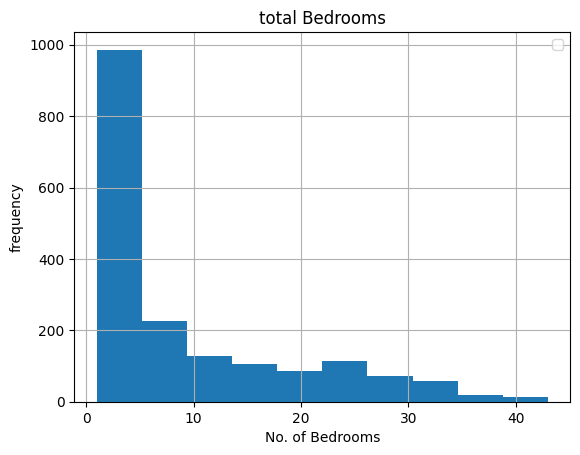

In [235]:
# Visualizing Total Bedroom Column to check the spread of data
start_train_data['total_bedrooms'].value_counts().hist()
plt.legend()
plt.xlabel('No. of Bedrooms')
plt.ylabel('frequency')
plt.title('total Bedrooms')
plt.show()

In [236]:
# since the data comes out to be skewed, hence there are chances of presence of outliers
# therefore, we use median
median=start_train_data['total_bedrooms'].median()
median

433.0

In [237]:
start_train_data['total_bedrooms'].fillna(median, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_11400\4091966410.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  start_train_data['total_bedrooms'].fillna(median, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_11400\4091966410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start_train_data['total_bedrooms'].fillna(median, inplace=Tru

In [238]:
start_train_data.loc[null_index]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
6253,-117.96,34.03,35.0,2093.0,433.0,1755.0,403.0,3.4115,150400.0
6541,-118.05,34.04,33.0,1348.0,433.0,1098.0,257.0,4.2917,161200.0
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,95800.0
4743,-118.36,34.05,42.0,1372.0,433.0,674.0,271.0,2.8793,202100.0
15607,-116.66,32.79,13.0,843.0,433.0,918.0,152.0,6.2152,240600.0
...,...,...,...,...,...,...,...,...,...
18332,-122.16,37.45,47.0,4234.0,433.0,1808.0,1093.0,4.2297,425000.0
10761,-117.87,33.62,8.0,1266.0,433.0,375.0,183.0,9.8020,500001.0
7228,-118.16,34.01,40.0,1552.0,433.0,1919.0,427.0,2.2596,137500.0
9970,-122.48,38.50,37.0,3049.0,433.0,1287.0,439.0,4.3125,276500.0


<h1>Scaling Features</h1>

In [239]:
start_train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
10237,-117.87,33.91,16.0,2434.0,455.0,1017.0,476.0,4.2188,176300.0
1290,-121.79,38.00,34.0,3090.0,593.0,1588.0,566.0,3.6118,124700.0
11221,-117.90,33.80,23.0,1368.0,397.0,1940.0,358.0,3.0789,350000.0
20394,-118.87,34.22,14.0,3108.0,451.0,1566.0,434.0,6.2423,305400.0
7336,-118.15,33.98,37.0,1184.0,290.0,1320.0,276.0,2.3000,165600.0


In [240]:
# strat_train_data.iloc[r,c]
start_train_numeric=start_train_data.iloc[:,0:8]

In [241]:
start_train_numeric.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
10237,-117.87,33.91,16.0,2434.0,455.0,1017.0,476.0,4.2188
1290,-121.79,38.00,34.0,3090.0,593.0,1588.0,566.0,3.6118
11221,-117.90,33.80,23.0,1368.0,397.0,1940.0,358.0,3.0789
20394,-118.87,34.22,14.0,3108.0,451.0,1566.0,434.0,6.2423
7336,-118.15,33.98,37.0,1184.0,290.0,1320.0,276.0,2.3000


<h1>Min-Max Scaling</h1>

In [242]:
from sklearn.preprocessing import MinMaxScaler
normalizer=MinMaxScaler()
normalizer.fit(start_train_numeric)
normalized=normalizer.transform(start_train_numeric)

In [243]:
normalized

array([[0.65587045, 0.1455898 , 0.29411765, ..., 0.06220096, 0.08866903,
        0.25647232],
       [0.25910931, 0.58023379, 0.64705882, ..., 0.09722733, 0.10546948,
        0.21461083],
       [0.65283401, 0.13390011, 0.43137255, ..., 0.11881978, 0.06664178,
        0.17785962],
       ...,
       [0.18825911, 0.55260361, 1.        , ..., 0.07269047, 0.08120217,
        0.26834113],
       [0.30769231, 0.58235919, 0.45098039, ..., 0.16752546, 0.1638977 ,
        0.15849437],
       [0.63157895, 0.16153029, 0.56862745, ..., 0.10409766, 0.0763487 ,
        0.1413015 ]])

In [244]:
normalized.shape

(16512, 8)

<Axes: ylabel='Density'>

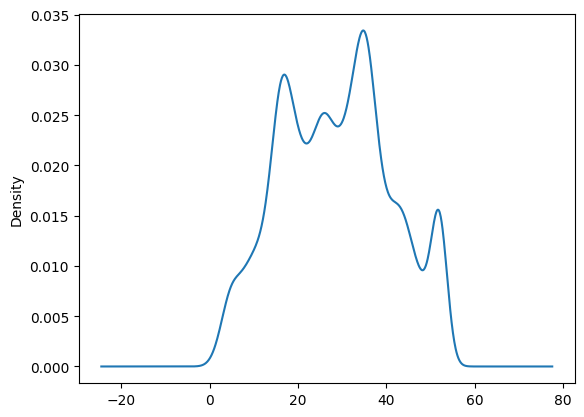

In [245]:
start_train_data['housing_median_age'].plot.kde()

In [246]:
start_train_data['housing_median_age'].min(), start_train_data['housing_median_age'].max()

(1.0, 52.0)

In [247]:
normalized_start_train_data=pd.DataFrame(normalized, columns=start_train_data.columns[:8], index=start_train_data.index)

In [248]:
normalized_start_train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
10237,0.655870,0.145590,0.294118,0.061855,0.073120,0.062201,0.088669,0.256472
1290,0.259109,0.580234,0.647059,0.078539,0.095345,0.097227,0.105469,0.214611
11221,0.652834,0.133900,0.431373,0.034742,0.063778,0.118820,0.066642,0.177860
20394,0.554656,0.178533,0.254902,0.078997,0.072475,0.095878,0.080829,0.396022
7336,0.627530,0.153029,0.705882,0.030063,0.046545,0.080788,0.051335,0.124143
...,...,...,...,...,...,...,...,...
14632,0.723684,0.027630,0.647059,0.123404,0.146722,0.127960,0.159231,0.231328
8945,0.595142,0.156217,0.509804,0.045272,0.075697,0.051159,0.078589,0.225707
16080,0.188259,0.552604,1.000000,0.062058,0.072153,0.072690,0.081202,0.268341
16365,0.307692,0.582359,0.450980,0.105677,0.153004,0.167525,0.163898,0.158494


<Axes: ylabel='Density'>

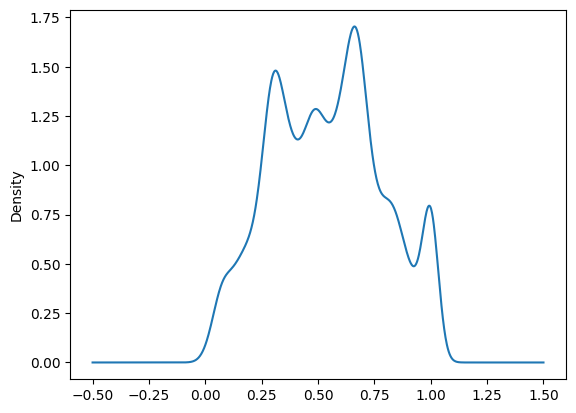

In [249]:
normalized_start_train_data['housing_median_age'].plot.kde()

In [250]:
normalized_start_train_data['housing_median_age'].min(), normalized_start_train_data['housing_median_age'].max()

(0.0, 0.9999999999999999)

In [251]:
from sklearn.preprocessing import StandardScaler
standardizer=StandardScaler()
standardizer.fit(start_train_numeric)
standardized=standardizer.transform(start_train_numeric)

In [252]:
standardized

array([[ 0.8568401 , -0.81341049, -1.00539266, ..., -0.36987978,
        -0.0573486 ,  0.18360453],
       [-1.0965938 ,  1.09618024,  0.4273443 , ...,  0.15400624,
         0.18053023, -0.13593062],
       [ 0.84189035, -0.86476867, -0.44821717, ...,  0.47696224,
        -0.36923419, -0.41645825],
       ...,
       [-1.44542129,  0.97478816,  1.86008126, ..., -0.21298922,
        -0.16307253,  0.2742009 ],
       [-0.85739782,  1.10551809, -0.36862067, ...,  1.20544822,
         1.00781997, -0.56427616],
       [ 0.7372421 , -0.7433766 ,  0.10895831, ...,  0.25676496,
        -0.23179308, -0.69551193]])

In [253]:
standardized.shape

(16512, 8)

In [254]:
standardized_start_train_data=pd.DataFrame(standardized, columns=start_train_data.columns[:8] ,index=start_train_data.index)

In [255]:
standardized_start_train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
10237,0.856840,-0.813410,-1.005393,-0.088425,-0.191727,-0.369880,-0.057349,0.183605
1290,-1.096594,1.096180,0.427344,0.217366,0.142204,0.154006,0.180530,-0.135931
11221,0.841890,-0.864769,-0.448217,-0.585334,-0.332075,0.476962,-0.369234,-0.416458
20394,0.358515,-0.668674,-1.164586,0.225756,-0.201406,0.133821,-0.168359,1.248809
7336,0.717309,-0.780728,0.666134,-0.671104,-0.590992,-0.091881,-0.585968,-0.826484
...,...,...,...,...,...,...,...,...
14632,1.190718,-1.331661,0.427344,1.039643,0.914117,0.613668,0.941743,-0.008327
8945,0.557845,-0.766721,-0.129831,-0.392350,-0.153010,-0.535028,-0.200076,-0.051230
16080,-1.445421,0.974788,1.860081,-0.084695,-0.206246,-0.212989,-0.163073,0.274201
16365,-0.857398,1.105518,-0.368621,0.714741,1.008489,1.205448,1.007820,-0.564276


<Axes: ylabel='Density'>

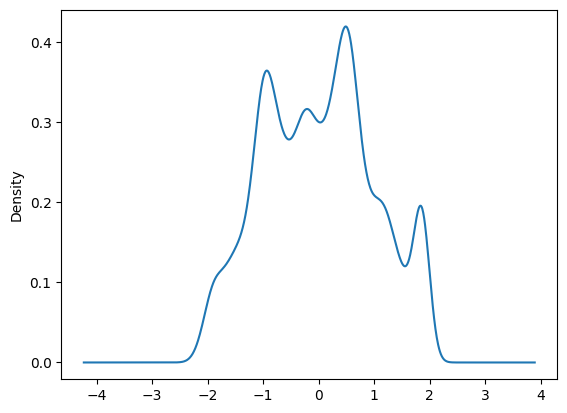

In [256]:
standardized_start_train_data['housing_median_age'].plot.kde()

In [257]:
standardized_start_train_data['housing_median_age'].min(), standardized_start_train_data['housing_median_age'].max()

(-2.1993401227780107, 1.8600812615063895)

In [258]:
standardized_start_train_data['housing_median_age'].mean()

-2.0978051337393947e-17

In [259]:
standardized_start_train_data['housing_median_age'].std()

1.0000302823832306

In [260]:
# Merge original Data set with scaled data set

In [261]:
start_train_data[start_train_data.columns[:8]]=standardized_start_train_data

C:\Users\HP\AppData\Local\Temp\ipykernel_11400\758295391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start_train_data[start_train_data.columns[:8]]=standardized_start_train_data


In [262]:
start_train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
10237,0.856840,-0.813410,-1.005393,-0.088425,-0.191727,-0.369880,-0.057349,0.183605,176300.0
1290,-1.096594,1.096180,0.427344,0.217366,0.142204,0.154006,0.180530,-0.135931,124700.0
11221,0.841890,-0.864769,-0.448217,-0.585334,-0.332075,0.476962,-0.369234,-0.416458,350000.0
20394,0.358515,-0.668674,-1.164586,0.225756,-0.201406,0.133821,-0.168359,1.248809,305400.0
7336,0.717309,-0.780728,0.666134,-0.671104,-0.590992,-0.091881,-0.585968,-0.826484,165600.0
...,...,...,...,...,...,...,...,...,...
14632,1.190718,-1.331661,0.427344,1.039643,0.914117,0.613668,0.941743,-0.008327,200000.0
8945,0.557845,-0.766721,-0.129831,-0.392350,-0.153010,-0.535028,-0.200076,-0.051230,413000.0
16080,-1.445421,0.974788,1.860081,-0.084695,-0.206246,-0.212989,-0.163073,0.274201,317700.0
16365,-0.857398,1.105518,-0.368621,0.714741,1.008489,1.205448,1.007820,-0.564276,92100.0


In [263]:
start_train_data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

<h1>Modeling</h1>

In [264]:
X_train=start_train_data.drop("median_house_value",axis=1)
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
10237,0.856840,-0.813410,-1.005393,-0.088425,-0.191727,-0.369880,-0.057349,0.183605
1290,-1.096594,1.096180,0.427344,0.217366,0.142204,0.154006,0.180530,-0.135931
11221,0.841890,-0.864769,-0.448217,-0.585334,-0.332075,0.476962,-0.369234,-0.416458
20394,0.358515,-0.668674,-1.164586,0.225756,-0.201406,0.133821,-0.168359,1.248809
7336,0.717309,-0.780728,0.666134,-0.671104,-0.590992,-0.091881,-0.585968,-0.826484


In [265]:
y_train=start_train_data["median_house_value"]
y_train.head()

10237    176300.0
1290     124700.0
11221    350000.0
20394    305400.0
7336     165600.0
Name: median_house_value, dtype: float64

<h1>Linear Regression</h1>

In [266]:
from sklearn.linear_model import LinearRegression
lin_Reg=LinearRegression()
lin_Reg.fit(X_train, y_train)

LinearRegression()

In [267]:
y_pred=lin_Reg.predict(X_train)
y_pred

array([218462.31238149, 196585.08054219, 136680.01522279, ...,
       287497.32527464, 130067.21608541, 138908.53960711])

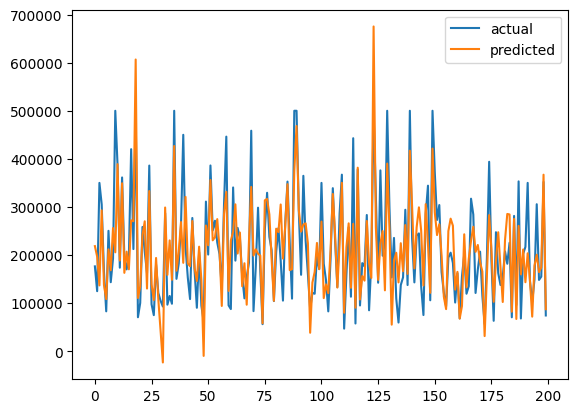

In [268]:
plt.plot(np.array(y_train)[:200],label='actual')
plt.plot(y_pred[:200], label='predicted')
plt.legend()
plt.show()

<h1>Calculating Error between actual and predicted</h1>

In [269]:
def rmse(y_actual, y_pred):
    sum = 0
    for ac,pr in zip(y_actual, y_pred):
        sum += (ac-pr)**2

    sum = sum/len(y_train)
    return np.sqrt(sum)

In [270]:
round(rmse(y_train, y_pred),2)

69561.35

In [271]:
from sklearn.metrics import mean_squared_error
lin_rmse=mean_squared_error(y_train, y_pred, squared=False)
lin_rmse

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


69561.34850816515

In [272]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_train, y_pred)
lin_mae

50947.65915323641

<h1>Decision Tree</h1>

In [273]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [274]:
y_pred_2=tree_reg.predict(X_train)

In [275]:
y_pred_2

array([176300., 124700., 350000., ..., 317700.,  92100., 187500.])

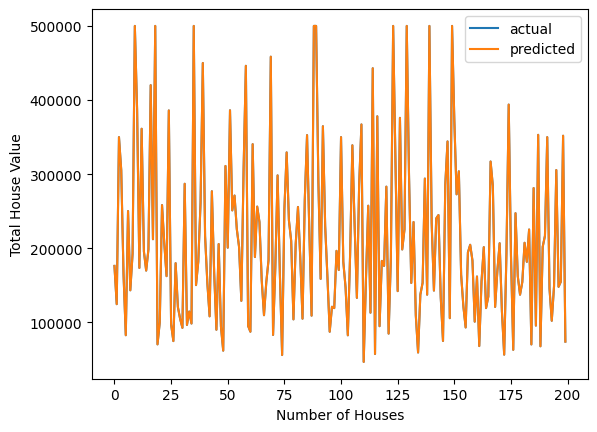

In [276]:
plt.plot(np.array(y_train)[:200], label='actual')
plt.plot(y_pred_2[:200], label = 'predicted')
plt.legend()
plt.xlabel('Number of Houses')
plt.ylabel('Total House Value')
plt.show()

In [277]:
from sklearn.metrics import mean_squared_error
tree_rmse=mean_squared_error(y_train, y_pred_2, squared=False)
tree_rmse

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.0

<h1>Cross Validation</h1>

Dicision Tree

In [278]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)

scores

array([-4.48571303e+09, -5.59682274e+09, -4.93664051e+09, -5.10491294e+09,
       -5.05625021e+09, -4.87443969e+09, -5.09931373e+09, -5.51194362e+09,
       -4.89579132e+09, -5.18759978e+09])

In [279]:
tree_rmse_scores=np.sqrt(-scores)

In [280]:
tree_rmse_scores

array([66975.46586086, 74811.91576372, 70261.2304672 , 71448.6734772 ,
       71107.31473458, 69817.18767185, 71409.47924061, 74242.46508391,
       69969.93157386, 72024.99413523])

In [281]:
def display_scores(rmse_scores):

    print("RMSE Scores:", rmse_scores, "\n")
    print("RMSE Scores Mean:", rmse_scores.mean(), "\n")
    print("RMSE Scores Standard deviation:", rmse_scores.std(), "\n")

In [282]:
display_scores(tree_rmse_scores)

RMSE Scores: [66975.46586086 74811.91576372 70261.2304672  71448.6734772
 71107.31473458 69817.18767185 71409.47924061 74242.46508391
 69969.93157386 72024.99413523] 

RMSE Scores Mean: 71206.86580090078 

RMSE Scores Standard deviation: 2127.209416283522 



In [283]:
lin_reg_rmse_scores = np.sqrt(-scores)

In [284]:
lin_reg_rmse_scores

array([66975.46586086, 74811.91576372, 70261.2304672 , 71448.6734772 ,
       71107.31473458, 69817.18767185, 71409.47924061, 74242.46508391,
       69969.93157386, 72024.99413523])

<h1>Random Forest</h1>

In [285]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, max_features = 10, random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_features=10, random_state=42)

In [286]:
y_pred_3 = forest_reg.predict(X_train)
y_pred_3

array([193994., 131553., 278695., ..., 320387., 100722., 186929.])

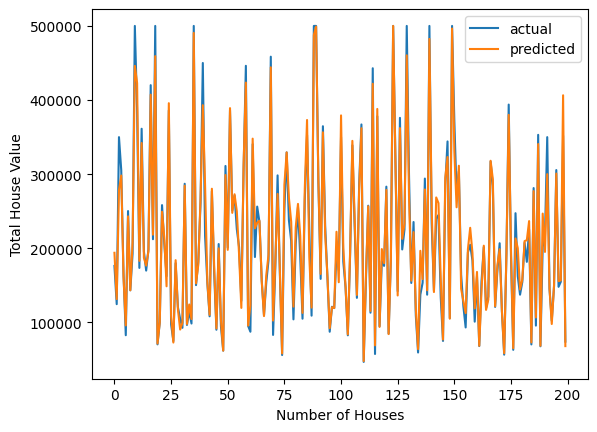

In [287]:
plt.plot(np.array(y_train)[:200], label='actual')
plt.plot(y_pred_3[:200], label = 'predicted')
plt.legend()
plt.xlabel('Number of Houses')
plt.ylabel('Total House Value')
plt.show()

In [288]:
forest_scores = cross_val_score(forest_reg, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)

In [291]:
forest_rmse_scores

array([49060.75222571, 52483.89784104, 48793.98488659, 46481.41630461,
       50224.78940724, 46095.52145785, 48957.27464124, 54436.79036582,
       49504.31893148, 50357.44509795])

In [290]:
display_scores(forest_rmse_scores)

RMSE Scores: [49060.75222571 52483.89784104 48793.98488659 46481.41630461
 50224.78940724 46095.52145785 48957.27464124 54436.79036582
 49504.31893148 50357.44509795] 

RMSE Scores Mean: 49639.61911595255 

RMSE Scores Standard deviation: 2367.0536397203155 



<h1>Cross Validation using Randomized Search CV</h1>

In [293]:
from sklearn.model_selection import RandomizedSearchCV

params = {'n_estimators': list(range(1,101)),
          'max_features': list(range(1,9))}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, params, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': [1, 2, 3, 4, 5, 6, 7,
                                                         8],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...]},
                   random_state=42, scoring='neg_mean_squared_error')

In [295]:
rnd_search.cv_results_

{'mean_fit_time': array([11.29480472,  7.50617189,  1.67207413,  3.37201481,  1.68841162,
         2.45648942,  3.18106561,  7.62871332,  7.57623687,  4.778616  ]),
 'std_fit_time': array([0.69358735, 0.06820938, 0.09126938, 0.15115159, 0.01372646,
        0.06429466, 0.01226504, 0.35819935, 0.07370757, 0.24395477]),
 'mean_score_time': array([0.10429273, 0.0772881 , 0.07499933, 0.03750062, 0.07136812,
        0.0224369 , 0.04686923, 0.0937408 , 0.06210456, 0.05937114]),
 'std_score_time': array([8.87424747e-03, 9.22373806e-03, 1.16867045e-02, 7.65317623e-03,
        8.30818107e-03, 8.37778873e-03, 6.77276644e-06, 7.32003281e-06,
        7.78864822e-04, 6.25033386e-03]),
 'param_n_estimators': masked_array(data=[97, 68, 64, 34, 67, 22, 47, 91, 61, 57],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=[7, 7, 1, 6, 1, 7, 4, 5, 8, 5],
 

In [296]:
randomSearch_results=rnd_search.cv_results_

In [297]:
randomSearch_results

{'mean_fit_time': array([11.29480472,  7.50617189,  1.67207413,  3.37201481,  1.68841162,
         2.45648942,  3.18106561,  7.62871332,  7.57623687,  4.778616  ]),
 'std_fit_time': array([0.69358735, 0.06820938, 0.09126938, 0.15115159, 0.01372646,
        0.06429466, 0.01226504, 0.35819935, 0.07370757, 0.24395477]),
 'mean_score_time': array([0.10429273, 0.0772881 , 0.07499933, 0.03750062, 0.07136812,
        0.0224369 , 0.04686923, 0.0937408 , 0.06210456, 0.05937114]),
 'std_score_time': array([8.87424747e-03, 9.22373806e-03, 1.16867045e-02, 7.65317623e-03,
        8.30818107e-03, 8.37778873e-03, 6.77276644e-06, 7.32003281e-06,
        7.78864822e-04, 6.25033386e-03]),
 'param_n_estimators': masked_array(data=[97, 68, 64, 34, 67, 22, 47, 91, 61, 57],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=[7, 7, 1, 6, 1, 7, 4, 5, 8, 5],
 

In [299]:
results_df=pd.DataFrame(randomSearch_results)

In [300]:
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,11.294805,0.693587,0.104293,0.008874,97,7,"{'n_estimators': 97, 'max_features': 7}",-2.656873e+09,-2.283013e+09,-2.331069e+09,-2.684714e+09,-2.470818e+09,-2.485298e+09,1.637806e+08,2
1,7.506172,0.068209,0.077288,0.009224,68,7,"{'n_estimators': 68, 'max_features': 7}",-2.673368e+09,-2.281639e+09,-2.330572e+09,-2.713784e+09,-2.504779e+09,-2.500828e+09,1.744518e+08,4
2,1.672074,0.091269,0.074999,0.011687,64,1,"{'n_estimators': 64, 'max_features': 1}",-3.406705e+09,-3.105670e+09,-3.111313e+09,-3.572374e+09,-3.141492e+09,-3.267511e+09,1.890966e+08,9
3,3.372015,0.151152,0.037501,0.007653,34,6,"{'n_estimators': 34, 'max_features': 6}",-2.719772e+09,-2.332294e+09,-2.370920e+09,-2.741489e+09,-2.521274e+09,-2.537150e+09,1.702676e+08,5
4,1.688412,0.013726,0.071368,0.008308,67,1,"{'n_estimators': 67, 'max_features': 1}",-3.401367e+09,-3.106888e+09,-3.110597e+09,-3.572011e+09,-3.149958e+09,-3.268164e+09,1.870166e+08,10
5,2.456489,0.064295,0.022437,0.008378,22,7,"{'n_estimators': 22, 'max_features': 7}",-2.797882e+09,-2.379166e+09,-2.467612e+09,-2.855968e+09,-2.614295e+09,-2.622985e+09,1.835942e+08,8
6,3.181066,0.012265,0.046869,0.000007,47,4,"{'n_estimators': 47, 'max_features': 4}",-2.700799e+09,-2.334119e+09,-2.406685e+09,-2.753352e+09,-2.551992e+09,-2.549389e+09,1.620114e+08,7
7,7.628713,0.358199,0.093741,0.000007,91,5,"{'n_estimators': 91, 'max_features': 5}",-2.608065e+09,-2.280962e+09,-2.337928e+09,-2.687449e+09,-2.454507e+09,-2.473782e+09,1.547212e+08,1
8,7.576237,0.073708,0.062105,0.000779,61,8,"{'n_estimators': 61, 'max_features': 8}",-2.705699e+09,-2.353110e+09,-2.374108e+09,-2.758016e+09,-2.522943e+09,-2.542775e+09,1.659444e+08,6
9,4.778616,0.243955,0.059371,0.006250,57,5,"{'n_estimators': 57, 'max_features': 5}",-2.619240e+09,-2.282381e+09,-2.382660e+09,-2.729392e+09,-2.465770e+09,-2.495889e+09,1.606564e+08,3


In [301]:
results_df[['params', 'mean_test_score']]

,params,mean_test_score
0,"{'n_estimators': 97, 'max_features': 7}",-2.485298e+09
1,"{'n_estimators': 68, 'max_features': 7}",-2.500828e+09
2,"{'n_estimators': 64, 'max_features': 1}",-3.267511e+09
3,"{'n_estimators': 34, 'max_features': 6}",-2.537150e+09
4,"{'n_estimators': 67, 'max_features': 1}",-3.268164e+09
5,"{'n_estimators': 22, 'max_features': 7}",-2.622985e+09
6,"{'n_estimators': 47, 'max_features': 4}",-2.549389e+09
7,"{'n_estimators': 91, 'max_features': 5}",-2.473782e+09
8,"{'n_estimators': 61, 'max_features': 8}",-2.542775e+09
9,"{'n_estimators': 57, 'max_features': 5}",-2.495889e+09


In [302]:
results_df['mean_test_score'].argmax()

7

In [303]:
results_df['params'][results_df['mean_test_score'].argmax()]

{'n_estimators': 91, 'max_features': 5}

In [304]:
rnd_search.best_estimator_

RandomForestRegressor(max_features=5, n_estimators=91, random_state=42)

In [305]:
feature_imp = rnd_search.best_estimator_.feature_importances_
feature_imp

array([0.16509691, 0.16290784, 0.05694645, 0.02962116, 0.03110045,
       0.04157361, 0.02720845, 0.48554514])

In [306]:
feature_imp.argmax()

7

In [308]:
X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [309]:
X_train.columns[feature_imp.argmax()]

'median_income'

In [311]:
final_model = rnd_search.best_estimator_

In [312]:
final_model

RandomForestRegressor(max_features=5, n_estimators=91, random_state=42)

Joblib Library - Used to serialize (save) a trained machine learning model to a file and later deserialize (load) it back into memory

In [313]:
import joblib
joblib.dump(final_model, "final_model.pkl")

['final_model.pkl']

In [314]:
final_model = joblib.load("final_model.pkl")
final_model

RandomForestRegressor(max_features=5, n_estimators=91, random_state=42)